If the weights are not correctly initialized, it may give rise to the Vanishing Gradient problem or the Exploding Gradient problem. Hence, selecting an appropriate weight initialization strategy is critical when training DL models.


fan_in = Number of input paths towards the neuron

fan_out = Number of output paths towards the neuron

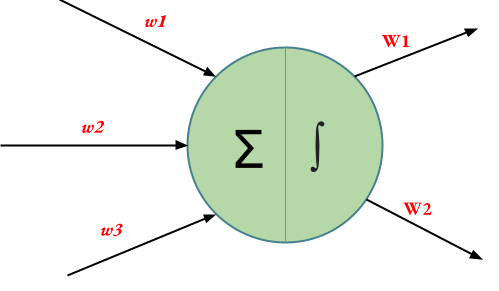

For the above neuron,

fan_in = 3 (Number of input paths towards the neuron)

fan_out = 2 (Number of output paths towards the neuron)


#Weight Initialization Techniques
#1. Zero Initialization
As the name suggests, all the weights are assigned zero as the initial value is zero initialization. This kind of initialization is highly ineffective as neurons learn the same feature during each iteration. Rather, during any kind of constant initialization, the same issue happens to occur. Thus, constant initializations are not preferred.

# Zero Initialization
from tensorflow.keras import layers

from tensorflow.keras import initializers

initializer = tf.keras.initializers.Zeros()

layer = tf.keras.layers.Dense(
3, kernel_initializer=initializer)


#2. Random Initialization
In an attempt to overcome the shortcomings of Zero or Constant Initialization, random initialization assigns random values except for zeros as weights to neuron paths. However, assigning values randomly to the weights, problems such as Overfitting, Vanishing Gradient Problem, Exploding Gradient Problem might occur.


Random Initialization can be of two kinds:

Random Normal

Random Uniform

##a) Random Normal:
The weights are initialized from values in a normal distribution.

image.png


# Random Normal Distribution
from tensorflow.keras import layers

from tensorflow.keras import initializers

initializer = tf.keras.initializers.RandomNormal(
mean=0., stddev=1.)

layer = tf.keras.layers.Dense(3, kernel_initializer=initializer)


##b) Random Uniform:
The weights are initialized from values in a uniform distribution.

image.png




# Random Uniform Initialization
from tensorflow.keras import layers

from tensorflow.keras import initializers

initializer = tf.keras.initializers.RandomUniform(
minval=0.,maxval=1.)

layer = tf.keras.layers.Dense(3, kernel_initializer=initializer)


#3. Xavier/Glorot Initialization
In Xavier/Glorot weight initialization, the weights are assigned from values of a uniform distribution as follows:

image.png

Xavier/Glorot Initialization often termed as Xavier Uniform Initialization, is suitable for layers where the activation function used is Sigmoid.

# Xavier/Glorot Uniform Initialization
from tensorflow.keras import layers

from tensorflow.keras import initializers

initializer = tf.keras.initializers.GlorotUniform()

layer = tf.keras.layers.Dense(3, kernel_initializer=initializer)


#4. Normalized Xavier/Glorot Initialization
In Normalized Xavier/Glorot weight initialization, the weights are assigned from values of a normal distribution as follows:

image.png
Here,  image.png is given by:

image.png
Xavier/Glorot Initialization, too, is suitable for layers where the activation function used is Sigmoid.


# Normailzed Xavier/Glorot Uniform Initialization
from tensorflow.keras import layers

from tensorflow.keras import initializers

initializer = tf.keras.initializers.GlorotNormal()

layer = tf.keras.layers.Dense(3, kernel_initializer=initializer)


#5. He Uniform Initialization
In He Uniform weight initialization, the weights are assigned from values of a uniform distribution as follows:

image.png

He Uniform Initialization is suitable for layers where ReLU activation function is used.

# He Uniform Initialization
from tensorflow.keras import layers

from tensorflow.keras import initializers

initializer = tf.keras.initializers.HeUniform()

layer = tf.keras.layers.Dense(3, kernel_initializer=initializer)

#6. He Normal Initialization
In He Normal weight initialization, the weights are assigned from values of a normal distribution as follows:

image.png


Here, sigma is given by:

image.png

He Uniform Initialization, too, is suitable for layers where ReLU activation function is used.

# He Normal Initialization
from tensorflow.keras import layers

from tensorflow.keras import initializers

initializer = tf.keras.initializers.HeNormal()

layer = tf.keras.layers.Dense(3, kernel_initializer=initializer)


#Case1: default way to check weight initialization.

##Mind it each time the algorithim apply different weight and your model outputs are different.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/test.csv')

In [3]:
df.head()

,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Type
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1


In [4]:
X = df.iloc[:,0:-1].values
X

array([[ 0.455 ,  0.365 ,  0.095 , ...,  0.101 ,  0.15  , 15.    ],
       [ 0.35  ,  0.265 ,  0.09  , ...,  0.0485,  0.07  ,  7.    ],
       [ 0.53  ,  0.42  ,  0.135 , ...,  0.1415,  0.21  ,  9.    ],
       ...,
       [ 0.6   ,  0.475 ,  0.205 , ...,  0.2875,  0.308 ,  9.    ],
       [ 0.625 ,  0.485 ,  0.15  , ...,  0.261 ,  0.296 , 10.    ],
       [ 0.71  ,  0.555 ,  0.195 , ...,  0.3765,  0.495 , 12.    ]])

In [5]:
y = df.iloc[:,-1].values.astype(float)
y

array([1., 1., 0., ..., 1., 0., 1.])

In [6]:
df.columns

Index(['LongestShell', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight',
       'VisceraWeight', 'ShellWeight', 'Rings', 'Type'],
      dtype='object')

In [7]:
X.shape, y.shape

((4177, 8), (4177,))

In [8]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [9]:
model = Sequential()

model.add(Dense(2,activation='sigmoid',input_dim=8))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 18        
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 21 (84.00 Byte)
Trainable params: 21 (84.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.get_weights()

[array([[-0.00562197,  0.35664117],
        [ 0.5487542 ,  0.46310878],
        [-0.20755953,  0.64193475],
        [ 0.00782257,  0.3557036 ],
        [ 0.18902463,  0.6447252 ],
        [ 0.43302703,  0.31256735],
        [ 0.48586118,  0.22579181],
        [ 0.20378137,  0.5688585 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 1.2667373],
        [-0.934723 ]], dtype=float32),
 array([0.], dtype=float32)]

In [11]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
105/105 [==============================] - 1s 3ms/step - loss: 0.6503 - accuracy: 0.6800 - val_loss: 0.6192 - val_accuracy: 0.7153
Epoch 2/100
105/105 [==============================] - 0s 2ms/step - loss: 0.6327 - accuracy: 0.6800 - val_loss: 0.6043 - val_accuracy: 0.7153
Epoch 3/100
105/105 [==============================] - 0s 1ms/step - loss: 0.6250 - accuracy: 0.6800 - val_loss: 0.5958 - val_accuracy: 0.7153
Epoch 4/100
105/105 [==============================] - 0s 2ms/step - loss: 0.6204 - accuracy: 0.6800 - val_loss: 0.5917 - val_accuracy: 0.7153
Epoch 5/100
105/105 [==============================] - 0s 2ms/step - loss: 0.6178 - accuracy: 0.6800 - val_loss: 0.5890 - val_accuracy: 0.7153
Epoch 6/100
105/105 [==============================] - 0s 2ms/step - loss: 0.6156 - accuracy: 0.6800 - val_loss: 0.5874 - val_accuracy: 0.7153
Epoch 7/100
105/105 [==============================] - 0s 2ms/step - loss: 0.6138 - accuracy: 0.6800 - val_loss: 0.5862 - val_accuracy: 0.7153

In [13]:
model.get_weights()

[array([[ 1.1074871 , -0.9244331 ],
        [ 1.640391  , -0.6088128 ],
        [ 0.8371327 ,  0.44399032],
        [ 0.54266995,  1.8596315 ],
        [ 0.73149246,  1.4441768 ],
        [ 0.95807856,  2.358077  ],
        [ 1.0482508 ,  1.7799335 ],
        [ 1.3199273 ,  0.21311226]], dtype=float32),
 array([ 1.5319039, -2.8785408], dtype=float32),
 array([[ 1.9185447],
        [-2.5467634]], dtype=float32),
 array([0.6867046], dtype=float32)]

#Case-2: Initialize weight with Zero.(relu)


In [14]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=8))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 18        
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 21 (84.00 Byte)
Trainable params: 21 (84.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
initial_weights = model.get_weights()

In [16]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [17]:
model.set_weights(initial_weights)

In [18]:
model.get_weights()

[array([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [19]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
105/105 [==============================] - 1s 3ms/step - loss: 0.6862 - accuracy: 0.6735 - val_loss: 0.6758 - val_accuracy: 0.7153
Epoch 2/100
105/105 [==============================] - 0s 2ms/step - loss: 0.6728 - accuracy: 0.6800 - val_loss: 0.6609 - val_accuracy: 0.7153
Epoch 3/100
105/105 [==============================] - 0s 3ms/step - loss: 0.6617 - accuracy: 0.6800 - val_loss: 0.6482 - val_accuracy: 0.7153
Epoch 4/100
105/105 [==============================] - 0s 2ms/step - loss: 0.6529 - accuracy: 0.6800 - val_loss: 0.6381 - val_accuracy: 0.7153
Epoch 5/100
105/105 [==============================] - 0s 2ms/step - loss: 0.6460 - accuracy: 0.6800 - val_loss: 0.6298 - val_accuracy: 0.7153
Epoch 6/100
105/105 [==============================] - 0s 2ms/step - loss: 0.6406 - accuracy: 0.6800 - val_loss: 0.6231 - val_accuracy: 0.7153
Epoch 7/100
105/105 [==============================] - 0s 2ms/step - loss: 0.6367 - accuracy: 0.6800 - val_loss: 0.6180 - val_accuracy: 0.7153

In [21]:
model.get_weights()

[array([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.7545951], dtype=float32)]

#Case-3: Initialize weight with Zero.(tanh)


In [22]:
model = Sequential()

model.add(Dense(2,activation='tanh',input_dim=8))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 18        
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 21 (84.00 Byte)
Trainable params: 21 (84.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model.get_weights()

[array([[ 0.70410395,  0.7308798 ],
        [ 0.24718797, -0.2575944 ],
        [-0.3102408 ,  0.6910924 ],
        [-0.42800623,  0.10024166],
        [-0.5448965 ,  0.04366368],
        [ 0.0672729 ,  0.20940608],
        [ 0.6595715 ,  0.5647762 ],
        [-0.02484697, -0.73239326]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.6498825],
        [ 1.1237952]], dtype=float32),
 array([0.], dtype=float32)]

In [24]:
initial_weights = model.get_weights()

In [25]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [26]:
model.set_weights(initial_weights)

In [27]:
model.get_weights()

[array([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [28]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [29]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
105/105 [==============================] - 1s 2ms/step - loss: 0.6846 - accuracy: 0.6770 - val_loss: 0.6733 - val_accuracy: 0.7153
Epoch 2/100
105/105 [==============================] - 0s 2ms/step - loss: 0.6704 - accuracy: 0.6800 - val_loss: 0.6579 - val_accuracy: 0.7153
Epoch 3/100
105/105 [==============================] - 0s 2ms/step - loss: 0.6594 - accuracy: 0.6800 - val_loss: 0.6453 - val_accuracy: 0.7153
Epoch 4/100
105/105 [==============================] - 0s 1ms/step - loss: 0.6509 - accuracy: 0.6800 - val_loss: 0.6356 - val_accuracy: 0.7153
Epoch 5/100
105/105 [==============================] - 0s 1ms/step - loss: 0.6444 - accuracy: 0.6800 - val_loss: 0.6277 - val_accuracy: 0.7153
Epoch 6/100
105/105 [==============================] - 0s 1ms/step - loss: 0.6395 - accuracy: 0.6800 - val_loss: 0.6215 - val_accuracy: 0.7153
Epoch 7/100
105/105 [==============================] - 0s 1ms/step - loss: 0.6358 - accuracy: 0.6800 - val_loss: 0.6170 - val_accuracy: 0.7153

In [30]:
model.get_weights()

[array([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.75348073], dtype=float32)]

#Case-4: Initialize weight with Zero.(Sigmoid)

##LINEAR working...checked with increase of neurons.


In [31]:
model = Sequential()

model.add(Dense(2,activation='sigmoid',input_dim=8))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 2)                 18        
                                                                 
 dense_7 (Dense)             (None, 1)                 3         
                                                                 
Total params: 21 (84.00 Byte)
Trainable params: 21 (84.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model.get_weights()

[array([[-0.04517597,  0.14111209],
        [ 0.05307651, -0.05856293],
        [-0.2934722 , -0.509092  ],
        [ 0.16798848, -0.43931   ],
        [-0.3233633 ,  0.2489537 ],
        [-0.0589214 ,  0.73189723],
        [ 0.5511981 ,  0.74297917],
        [-0.02833664, -0.6219653 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.8153476],
        [-1.3690217]], dtype=float32),
 array([0.], dtype=float32)]

In [33]:
initial_weights = model.get_weights()

In [34]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [35]:
model.set_weights(initial_weights)

In [36]:
model.get_weights()

[array([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [37]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [38]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
105/105 [==============================] - 1s 3ms/step - loss: 0.6768 - accuracy: 0.6764 - val_loss: 0.6521 - val_accuracy: 0.7153
Epoch 2/100
105/105 [==============================] - 0s 2ms/step - loss: 0.6485 - accuracy: 0.6800 - val_loss: 0.6238 - val_accuracy: 0.7153
Epoch 3/100
105/105 [==============================] - 0s 1ms/step - loss: 0.6353 - accuracy: 0.6800 - val_loss: 0.6114 - val_accuracy: 0.7153
Epoch 4/100
105/105 [==============================] - 0s 1ms/step - loss: 0.6309 - accuracy: 0.6800 - val_loss: 0.6063 - val_accuracy: 0.7153
Epoch 5/100
105/105 [==============================] - 0s 1ms/step - loss: 0.6291 - accuracy: 0.6800 - val_loss: 0.6037 - val_accuracy: 0.7153
Epoch 6/100
105/105 [==============================] - 0s 1ms/step - loss: 0.6284 - accuracy: 0.6800 - val_loss: 0.6023 - val_accuracy: 0.7153
Epoch 7/100
105/105 [==============================] - 0s 2ms/step - loss: 0.6281 - accuracy: 0.6800 - val_loss: 0.6019 - val_accuracy: 0.7153

In [39]:
model.get_weights()

[array([[1.3645728 , 1.3645728 ],
        [1.331666  , 1.331666  ],
        [1.2646497 , 1.2646497 ],
        [0.52743477, 0.52743477],
        [0.5426643 , 0.5426643 ],
        [0.5007292 , 0.5007292 ],
        [0.5546721 , 0.5546721 ],
        [1.3639214 , 1.3639214 ]], dtype=float32),
 array([1.9518261, 1.9518261], dtype=float32),
 array([[0.24973841],
        [0.24973841]], dtype=float32),
 array([0.25352576], dtype=float32)]

In [40]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=8))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                90        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 101 (404.00 Byte)
Trainable params: 101 (404.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
model.get_weights()

[array([[-0.34579673,  0.49191177,  0.20212388, -0.34274748,  0.31054842,
         -0.03155333,  0.4469372 , -0.44728696, -0.47054476,  0.40352452],
        [ 0.34657365,  0.05232692, -0.3486994 ,  0.46146858,  0.4139498 ,
          0.15936673, -0.11982769,  0.47569525, -0.44896865,  0.13392162],
        [ 0.56954956,  0.13114578,  0.20774221,  0.4786749 , -0.435381  ,
          0.26063657, -0.05559576,  0.22779828, -0.17472005, -0.56466377],
        [ 0.5735291 , -0.11959258, -0.03165394,  0.47244775, -0.4529451 ,
         -0.35412985,  0.48704898, -0.09832302,  0.5761826 , -0.3671043 ],
        [-0.24742895, -0.07527417, -0.5088386 , -0.2675252 ,  0.5671444 ,
         -0.47594756, -0.0229404 , -0.41110885, -0.50342023,  0.24048227],
        [ 0.06763345,  0.2484144 , -0.3607602 , -0.15496051,  0.3462236 ,
         -0.317555  , -0.45577276,  0.48135936,  0.02880168,  0.06749731],
        [-0.11187148,  0.5461168 , -0.559414  , -0.33635786,  0.2674412 ,
          0.18357873, -0.2260536

In [42]:
initial_weights = model.get_weights()

In [43]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [44]:
model.set_weights(initial_weights)

In [45]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [46]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [47]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
105/105 [==============================] - 1s 3ms/step - loss: 0.6536 - accuracy: 0.6782 - val_loss: 0.6123 - val_accuracy: 0.7153
Epoch 2/100
105/105 [==============================] - 0s 2ms/step - loss: 0.6334 - accuracy: 0.6800 - val_loss: 0.6052 - val_accuracy: 0.7153
Epoch 3/100
105/105 [==============================] - 0s 2ms/step - loss: 0.6306 - accuracy: 0.6800 - val_loss: 0.6031 - val_accuracy: 0.7153
Epoch 4/100
105/105 [==============================] - 0s 2ms/step - loss: 0.6253 - accuracy: 0.6800 - val_loss: 0.5988 - val_accuracy: 0.7153
Epoch 5/100
105/105 [==============================] - 0s 1ms/step - loss: 0.6184 - accuracy: 0.6800 - val_loss: 0.5887 - val_accuracy: 0.7153
Epoch 6/100
105/105 [==============================] - 0s 2ms/step - loss: 0.6115 - accuracy: 0.6800 - val_loss: 0.5837 - val_accuracy: 0.7153
Epoch 7/100
105/105 [==============================] - 0s 2ms/step - loss: 0.6059 - accuracy: 0.6800 - val_loss: 0.5780 - val_accuracy: 0.7153

In [48]:
model.get_weights()

[array([[ 0.22535439,  0.22535439,  0.22535439,  0.22535439,  0.22535439,
          0.22535439,  0.22535439,  0.22535439,  0.22535428,  0.22535428],
        [ 0.08479504,  0.08479504,  0.08479504,  0.08479504,  0.08479504,
          0.08479504,  0.08479504,  0.08479504,  0.08479505,  0.08479505],
        [-0.6492732 , -0.6492732 , -0.6492732 , -0.6492732 , -0.6492732 ,
         -0.6492732 , -0.6492732 , -0.6492732 , -0.6492733 , -0.6492733 ],
        [-1.139993  , -1.139993  , -1.139993  , -1.139993  , -1.139993  ,
         -1.139993  , -1.139993  , -1.139993  , -1.1399928 , -1.1399928 ],
        [-0.57371324, -0.57371324, -0.57371324, -0.57371324, -0.57371324,
         -0.57371324, -0.57371324, -0.57371324, -0.5737131 , -0.5737131 ],
        [-1.6545714 , -1.6545714 , -1.6545714 , -1.6545714 , -1.6545714 ,
         -1.6545714 , -1.6545714 , -1.6545714 , -1.6545719 , -1.6545719 ],
        [-1.1311226 , -1.1311226 , -1.1311226 , -1.1311226 , -1.1311226 ,
         -1.1311226 , -1.1311226

#Case5:Zeros initilization.

In [61]:
# Zero Initialization
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import initializers

initializer = tf.keras.initializers.Zeros()


In [62]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=8,kernel_initializer=initializer))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 2)                 18        
                                                                 
 dense_15 (Dense)            (None, 1)                 3         
                                                                 
Total params: 21 (84.00 Byte)
Trainable params: 21 (84.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
model.get_weights()

[array([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.6596491],
        [-0.2786696]], dtype=float32),
 array([0.], dtype=float32)]

In [64]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [65]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
105/105 [==============================] - 1s 3ms/step - loss: 0.6852 - accuracy: 0.6764 - val_loss: 0.6742 - val_accuracy: 0.7153
Epoch 2/100
105/105 [==============================] - 0s 1ms/step - loss: 0.6710 - accuracy: 0.6800 - val_loss: 0.6584 - val_accuracy: 0.7153
Epoch 3/100
105/105 [==============================] - 0s 2ms/step - loss: 0.6598 - accuracy: 0.6800 - val_loss: 0.6457 - val_accuracy: 0.7153
Epoch 4/100
105/105 [==============================] - 0s 2ms/step - loss: 0.6511 - accuracy: 0.6800 - val_loss: 0.6358 - val_accuracy: 0.7153
Epoch 5/100
105/105 [==============================] - 0s 2ms/step - loss: 0.6444 - accuracy: 0.6800 - val_loss: 0.6279 - val_accuracy: 0.7153
Epoch 6/100
105/105 [==============================] - 0s 2ms/step - loss: 0.6393 - accuracy: 0.6800 - val_loss: 0.6214 - val_accuracy: 0.7153
Epoch 7/100
105/105 [==============================] - 0s 2ms/step - loss: 0.6356 - accuracy: 0.6800 - val_loss: 0.6164 - val_accuracy: 0.7153

In [66]:
model.get_weights()

[array([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.6596491],
        [-0.2786696]], dtype=float32),
 array([0.7549186], dtype=float32)]

#2. Random Initialization

###In an attempt to overcome the shortcomings of Zero or Constant Initialization, random initialization assigns random values except for zeros as weights to neuron paths. However, assigning values randomly to the weights, problems such as **Overfitting, Vanishing Gradient Problem, Exploding Gradient Problem might occur.**


##Reasons for Overfitting:
 High variance and low bias.

The model is too complex.

The size of the training data.

##Techniques to Reduce Overfitting

Increase training data.

Reduce model complexity.

Early stopping during the training phase (have an eye over the loss over the training period as soon as loss begins to increase stop training).

Ridge Regularization and Lasso Regularization.

Use dropout for neural networks to tackle overfitting.

---------------------------------------------------------------------
#Reasons for Underfitting
The model is too simple, So it may be not capable to represent the complexities in the data.

The input features which is used to train the model is not the adequate representations of underlying factors influencing the target variable.

The size of the training dataset used is not enough.

Excessive regularization are used to prevent the overfitting, which constraint the model to capture the data well.

Features are not scaled.

##Techniques to Reduce Underfitting

Increase model complexity.

Increase the number of features, performing feature engineering.

Remove noise from the data.

Increase the number of epochs or increase the duration of training to get better results.

In [67]:
# Random Normal Distribution
from tensorflow.keras import layers
from tensorflow.keras import initializers

initializer = tf.keras.initializers.RandomNormal(
  mean=0., stddev=1.)

In [69]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=8,kernel_initializer=initializer))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 2)                 18        
                                                                 
 dense_19 (Dense)            (None, 1)                 3         
                                                                 
Total params: 21 (84.00 Byte)
Trainable params: 21 (84.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [70]:
model.get_weights()

[array([[-1.0443983 , -0.03269392],
        [ 0.13848853,  0.5908715 ],
        [-1.7974945 , -0.13845819],
        [-2.2207909 ,  0.6692139 ],
        [ 0.02082727, -1.5952283 ],
        [-2.0529768 ,  2.4495487 ],
        [ 0.86785626,  0.6200869 ],
        [ 0.63991106,  1.0252864 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.8059155 ],
        [ 0.30850613]], dtype=float32),
 array([0.], dtype=float32)]

In [71]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
105/105 [==============================] - 1s 3ms/step - loss: 0.8153 - accuracy: 0.5124 - val_loss: 0.7954 - val_accuracy: 0.5789
Epoch 2/100
105/105 [==============================] - 0s 2ms/step - loss: 0.7835 - accuracy: 0.5403 - val_loss: 0.7638 - val_accuracy: 0.5909
Epoch 3/100
105/105 [==============================] - 0s 2ms/step - loss: 0.7561 - accuracy: 0.5699 - val_loss: 0.7368 - val_accuracy: 0.6244
Epoch 4/100
105/105 [==============================] - 0s 2ms/step - loss: 0.7338 - accuracy: 0.6121 - val_loss: 0.7142 - val_accuracy: 0.6806
Epoch 5/100
105/105 [==============================] - 0s 1ms/step - loss: 0.7160 - accuracy: 0.6450 - val_loss: 0.6967 - val_accuracy: 0.6938
Epoch 6/100
105/105 [==============================] - 0s 2ms/step - loss: 0.7007 - accuracy: 0.6612 - val_loss: 0.6832 - val_accuracy: 0.6926
Epoch 7/100
105/105 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.6702 - val_loss: 0.6697 - val_accuracy: 0.7069

In [72]:
model.get_weights()

[array([[-0.65506727, -0.47211307],
        [ 0.6805475 , -0.01091834],
        [-0.8684172 , -1.147423  ],
        [-0.76930636, -0.9565217 ],
        [ 0.9820397 , -2.712676  ],
        [-0.04991752,  0.2562094 ],
        [ 2.3113017 , -0.9935366 ],
        [ 0.7461884 ,  0.8824253 ]], dtype=float32),
 array([-1.2946227,  1.3850225], dtype=float32),
 array([[-0.53812534],
        [ 0.35094893]], dtype=float32),
 array([1.3835901], dtype=float32)]

#b) Random Uniform:

In [77]:
# Random Uniform Initialization
from tensorflow.keras import layers
from tensorflow.keras import initializers

initializer = tf.keras.initializers.RandomUniform()
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=8,kernel_initializer=initializer))
model.add(Dense(1,activation='sigmoid'))

print(model.summary())
print(model.get_weights())

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X,y,epochs=100,validation_split=0.2)
print(model.get_weights())


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 2)                 18        
                                                                 
 dense_27 (Dense)            (None, 1)                 3         
                                                                 
Total params: 21 (84.00 Byte)
Trainable params: 21 (84.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
[array([[-0.02155724,  0.0285247 ],
       [-0.00264717,  0.0441986 ],
       [ 0.00694698, -0.03464597],
       [ 0.0451389 , -0.01085757],
       [ 0.02194549,  0.01449269],
       [ 0.01315637,  0.03543757],
       [-0.02768041, -0.00815946],
       [-0.04308265,  0.00274141]], dtype=float32), array([0., 0.], dtype=float32), array([[ 0.5039134 ],
       [-0.49225122]], dtype=float32), array([0.], dtype=f

#3. Xavier/Glorot Initialization


##Xavier/Glorot Initialization often termed as Xavier Uniform Initialization, is suitable for layers where the activation function used is **Sigmoid.**

In [78]:
# Random Uniform Initialization
from tensorflow.keras import layers
from tensorflow.keras import initializers

initializer = tf.keras.initializers.GlorotUniform()


model = Sequential()

model.add(Dense(2,activation='sigmoid',input_dim=8,kernel_initializer=initializer))
model.add(Dense(1,activation='sigmoid'))

print(model.summary())
print(model.get_weights())

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X,y,epochs=100,validation_split=0.2)
print(model.get_weights())


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 2)                 18        
                                                                 
 dense_29 (Dense)            (None, 1)                 3         
                                                                 
Total params: 21 (84.00 Byte)
Trainable params: 21 (84.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
[array([[ 0.7373986 ,  0.77358174],
       [ 0.32113147,  0.18028122],
       [-0.4132497 , -0.67032754],
       [ 0.17214578,  0.68454885],
       [-0.256608  , -0.4671423 ],
       [ 0.30586112,  0.24584961],
       [ 0.46955585, -0.05722791],
       [ 0.7468014 , -0.4865156 ]], dtype=float32), array([0., 0.], dtype=float32), array([[-0.8292089],
       [-0.7919079]], dtype=float32), array([0.], dtype=flo

#4. Normalized Xavier/Glorot Initialization

##Xavier/Glorot Initialization, too, is suitable for layers where the activation function used is Sigmoid.



In [79]:

from tensorflow.keras import layers
from tensorflow.keras import initializers

initializer = tf.keras.initializers.GlorotNormal()


model = Sequential()

model.add(Dense(2,activation='sigmoid',input_dim=8,kernel_initializer=initializer))
model.add(Dense(1,activation='sigmoid'))

print(model.summary())
print(model.get_weights())

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X,y,epochs=100,validation_split=0.2)
print(model.get_weights())


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 2)                 18        
                                                                 
 dense_31 (Dense)            (None, 1)                 3         
                                                                 
Total params: 21 (84.00 Byte)
Trainable params: 21 (84.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
[array([[-0.01866647,  0.5383708 ],
       [ 0.8704364 ,  0.2397974 ],
       [-0.07851727, -0.8907971 ],
       [ 0.48241413,  0.1291903 ],
       [ 0.27534023, -0.10146821],
       [ 0.4082537 ,  0.79257005],
       [ 0.17022194,  0.45597526],
       [-0.51785254, -0.6109341 ]], dtype=float32), array([0., 0.], dtype=float32), array([[-0.36538827],
       [-0.17477584]], dtype=float32), array([0.], dtype=f

#5. He Uniform Initialization

##He Uniform Initialization is suitable for layers where **ReLU** activation function is used.

In [80]:

from tensorflow.keras import layers
from tensorflow.keras import initializers

initializer = tf.keras.initializers.HeUniform()


model = Sequential()

model.add(Dense(2,activation='relu',input_dim=8,kernel_initializer=initializer))
model.add(Dense(1,activation='sigmoid'))

print(model.summary())
print(model.get_weights())

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X,y,epochs=100,validation_split=0.2)
print(model.get_weights())


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 2)                 18        
                                                                 
 dense_33 (Dense)            (None, 1)                 3         
                                                                 
Total params: 21 (84.00 Byte)
Trainable params: 21 (84.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
[array([[ 0.0047465 , -0.24663872],
       [ 0.7210613 , -0.57938206],
       [-0.35909182,  0.66962844],
       [ 0.2841714 , -0.8145665 ],
       [-0.74964136, -0.05001771],
       [-0.12666923, -0.02414519],
       [-0.6735139 ,  0.6854008 ],
       [-0.5418669 , -0.5974921 ]], dtype=float32), array([0., 0.], dtype=float32), array([[-1.3862661 ],
       [-0.36620188]], dtype=float32), array([0.], dtype=f